In [41]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv("poultry_disease_dataset.csv")

In [44]:
data.shape

(254, 6)

In [45]:
data.info

<bound method DataFrame.info of       Animal              Symptom1              Symptom2          Symptom3  \
0    chicken            depression                 cough  ruffled feathers   
1    chicken              diarrhea      loss of appetite          diarrhea   
2    chicken              swelling              blisters          blisters   
3    chicken      loss of appetite               fatigue          swelling   
4    chicken  difficulty breathing            depression             cough   
..       ...                   ...                   ...               ...   
249  chicken      ruffled feathers                 cough               NaN   
250  chicken                 cough                   NaN          sneezing   
251  chicken  difficulty breathing                   NaN          sneezing   
252  chicken                   NaN      loss of appetite          diarrhea   
253  chicken                   NaN  difficulty breathing  ruffled feathers   

                 Symptom4      

In [46]:
data.describe().T

,count,unique,top,freq
Animal,254,1,chicken,254
Symptom1,244,24,loss of appetite,40
Symptom2,246,21,cough,42
Symptom3,249,19,fatigue,42
Symptom4,250,21,diarrhea,32
Disease,254,10,E. coli,37


<Axes: >

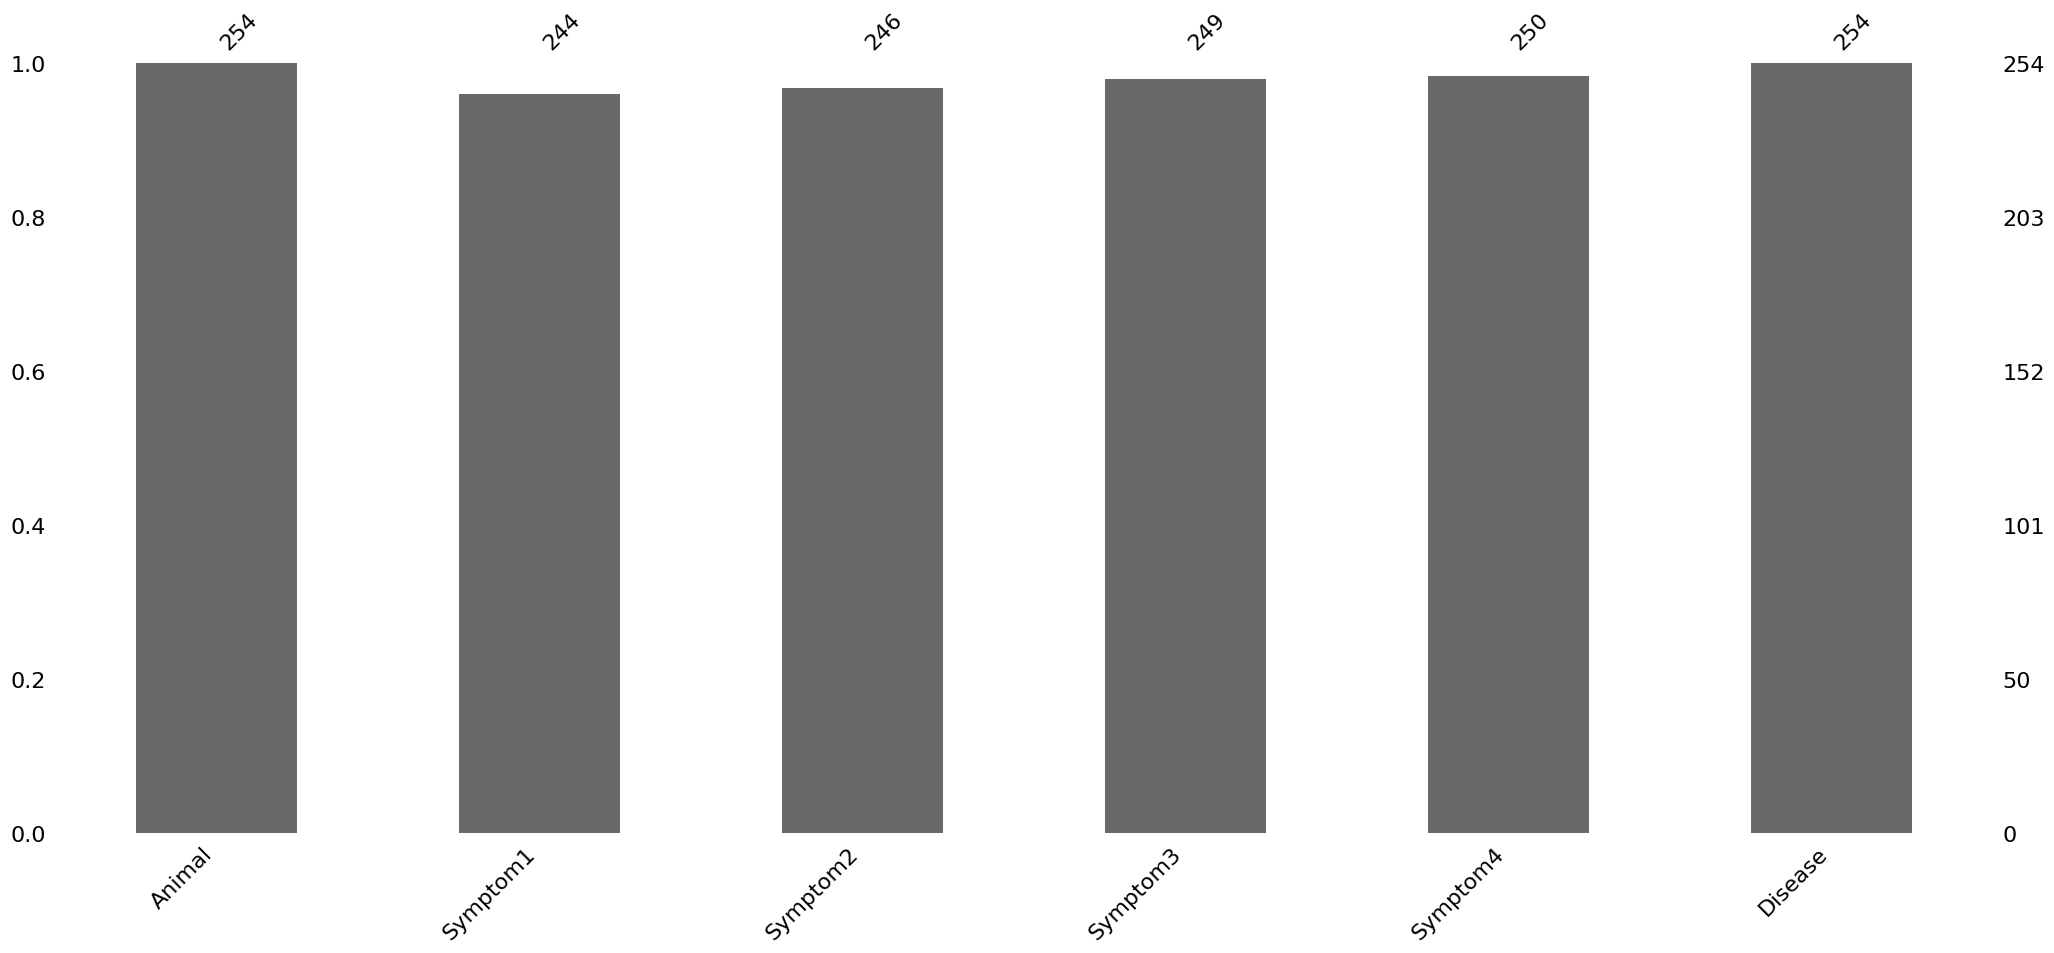

In [47]:
#Check for missing values
import missingno as msno
msno.bar(data)

In [48]:
data = data.dropna()

In [49]:
#all animals
all_animals = data['Animal'].unique()
print(f'{all_animals} \n number of animals = {len(all_animals)}')

# Unique Diseases
all_disease = data['Disease'].unique()
print(f'{all_disease}\n number of diseases = {len(all_disease)}')

['chicken'] 
 number of animals = 1
['E. coli' 'salmonella' 'mycoplasma synoviae' 'avian influenza'
 'new castle disease' 'gumboro' 'mycoplasma gallisepticum'
 'egg drop syndrome' 'Pasteurella multocida' 'infectious bronchitis']
 number of diseases = 10


In [50]:
#Unique Symptoms
def unique_symptoms():
    symptom_features = ['Symptom1','Symptom2','Symptom3', 'Symptom4']
    for i in symptom_features:
        symptoms = data[i].unique()
        print(f' {i} = {np.sort(symptoms)}\n\n Total = {len(symptoms)} \n')
    
        
unique_symptoms()

def are_symptoms_same():
    Symptop_1 = np.sort(data['Symptom1'].unique())
    Symptop_2 = np.sort(data['Symptom2'].unique())
    Symptop_3 = np.sort(data['Symptom3'].unique())
    Symptom_4 = np.sort(data['Symptom4'].unique())
    print("Are equal?")
    return np.array_equal(Symptop_1,Symptop_2) and np.array_equal(Symptop_1,Symptop_3) and np.array_equal(Symptom_1,Symptom_4)

are_symptoms_same()

def combined_unique_symptoms():
    all_symptoms = pd.concat([data['Symptom1'], data['Symptom2'], data['Symptom3'], data['Symptom4']])
    unique_symptoms = np.sort(all_symptoms.unique())
    print(f'Combined unique symptoms: {unique_symptoms}\n\nTotal unique symptoms: {len(unique_symptoms)}')

combined_unique_symptoms()

 Symptom1 = ['blisters' 'cough' 'decolored body parts' 'decrease in eggs'
 'dehydration' 'depression' 'diarrhea' 'difficulty breathing' 'discharge'
 'fatigue' 'fever' 'infection' 'inflammation' 'loss of appetite'
 'pale eggs' 'poor growth' 'reduction in eggs' 'ruffled feathers'
 'shall less eggs' 'shell legs' 'shell less eggs' 'sneezing'
 'soft shelled eggs' 'swelling']

 Total = 24 

 Symptom2 = ['blisters' 'cough' 'decolored body parts' 'decrease in egg' 'dehydration'
 'depression' 'diarrhea' 'difficulty breathing' 'discharge' 'fatigue'
 'infection' 'inflammation' 'loss of appetite' 'pale eggs' 'poor growth'
 'reduction in eggs' 'ruffled feathers' 'shall less eggs' 'sneezing'
 'soft shelled eggs' 'swelling']

 Total = 21 

 Symptom3 = ['blisters' 'cough' 'decolored body parts' 'decrease in egg' 'dehydration'
 'depression' 'diarrhea' 'difficulty breathing' 'discharge' 'fatigue'
 'inflammation' 'loss of appetite' 'pale eggs' 'reduction in eggs'
 'ruffled feathers' 'shell less eggs' 'sn

In [51]:
# Combine unique values from all symptom columns
all_symptoms = pd.concat([data['Symptom1'], data['Symptom2'], data['Symptom3'], data['Symptom4']])
unique_symptoms = all_symptoms.unique()

# Print combined unique values
print("Unique symptoms across all columns:", unique_symptoms)

Unique symptoms across all columns: ['depression' 'diarrhea' 'swelling' 'loss of appetite'
 'difficulty breathing' 'ruffled feathers' 'dehydration' 'cough'
 'discharge' 'decrease in eggs' 'poor growth' 'soft shelled eggs' 'fever'
 'shall less eggs' 'inflammation' 'shell less eggs' 'reduction in eggs'
 'sneezing' 'decolored body parts' 'pale eggs' 'shell legs' 'fatigue'
 'blisters' 'infection' 'decrease in egg']


In [52]:
# Copy dataframe(dataset)
df = data.copy()
df.head(10)

,Animal,Symptom1,Symptom2,Symptom3,Symptom4,Disease
0,chicken,depression,cough,ruffled feathers,difficulty breathing,E. coli
1,chicken,diarrhea,loss of appetite,diarrhea,poor growth,salmonella
2,chicken,swelling,blisters,blisters,decolored body parts,mycoplasma synoviae
3,chicken,loss of appetite,fatigue,swelling,diarrhea,avian influenza
4,chicken,difficulty breathing,depression,cough,ruffled feathers,E. coli
5,chicken,swelling,blisters,blisters,decolored body parts,mycoplasma synoviae
6,chicken,loss of appetite,diarrhea,cough,discharge,new castle disease
7,chicken,depression,cough,ruffled feathers,difficulty breathing,E. coli
8,chicken,ruffled feathers,cough,depression,difficulty breathing,E. coli
9,chicken,loss of appetite,swelling,fatigue,diarrhea,avian influenza


In [53]:
# #Lable Encoding Diseases
def label_encode_columns(data,columns, output_file):
    lb_animal = LabelEncoder()
    lb_disease = LabelEncoder()

    for column in columns:
        if column == 'Animal':
            data[column] = lb_animal.fit_transform(data[column])
        elif column == 'Disease':
            data[column] = lb_disease.fit_transform(data[column])

    with open(output_file, 'w') as file:
        for label, disease_name in enumerate(lb_disease.classes_):
            file.write(f"{label}: '{disease_name}'\n")
        file.write("\n")
    return data

col_to_encode = ['Animal','Disease']
output_file = 'poultry_disease.txt'
df= label_encode_columns(df, col_to_encode, output_file)


df.head(10)

AttributeError: 'LabelEncoder' object has no attribute 'classes_'

In [ ]:
# Create columns for each unique symptom and initialize them to 0
for symptom in unique_symptoms:
    df[symptom] = 0

# Update the new columns based on the symptoms in Symptom1, Symptom2, Symptom3, and Symptom4
for index, row in df.iterrows():
    for symptom_column in ['Symptom1', 'Symptom2', 'Symptom3', 'Symptom4']:
        symptom = row[symptom_column]
        if pd.notna(symptom):  # Check if symptom is not NaN
            df.loc[index, symptom] = 1

df.head(10)

,Animal,Symptom1,Symptom2,Symptom3,Symptom4,Disease,depression,diarrhea,swelling,loss of appetite,...,shell less eggs,reduction in eggs,sneezing,decolored body parts,pale eggs,shell legs,fatigue,blisters,infection,decrease in egg
0,0,depression,cough,ruffled feathers,difficulty breathing,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,diarrhea,loss of appetite,diarrhea,poor growth,9,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,swelling,blisters,blisters,decolored body parts,7,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,0,loss of appetite,fatigue,swelling,diarrhea,2,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0,difficulty breathing,depression,cough,ruffled feathers,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,swelling,blisters,blisters,decolored body parts,7,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
6,0,loss of appetite,diarrhea,cough,discharge,8,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,depression,cough,ruffled feathers,difficulty breathing,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,ruffled feathers,cough,depression,difficulty breathing,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,loss of appetite,swelling,fatigue,diarrhea,2,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Introduce incorrect symptoms
np.random.seed(42)  # For reproducibility

# Define the number of incorrect symptoms to add
num_incorrect_symptoms = int(0.15 * len(df))  # e.g., 10% of the rows

# Randomly select rows to modify
incorrect_rows = np.random.choice(df.index, size=num_incorrect_symptoms, replace=False)

# Randomly select symptoms to introduce as incorrect
incorrect_symptoms = np.random.choice(unique_symptoms, size=num_incorrect_symptoms, replace=True)

# Update the selected rows with incorrect symptoms
for row, symptom in zip(incorrect_rows, incorrect_symptoms):
    df.loc[row, symptom] = 1

# Display the first 10 rows of the DataFrame with incorrect symptoms
print(df.head(10))

   Animal              Symptom1          Symptom2          Symptom3  \
0       0            depression             cough  ruffled feathers   
1       0              diarrhea  loss of appetite          diarrhea   
2       0              swelling          blisters          blisters   
3       0      loss of appetite           fatigue          swelling   
4       0  difficulty breathing        depression             cough   
5       0              swelling          blisters          blisters   
6       0      loss of appetite          diarrhea             cough   
7       0            depression             cough  ruffled feathers   
8       0      ruffled feathers             cough        depression   
9       0      loss of appetite          swelling           fatigue   

               Symptom4  Disease  depression  diarrhea  swelling  \
0  difficulty breathing        0           1         0         0   
1           poor growth        9           0         1         0   
2  decolored b

In [ ]:
#Remove redundant colums
df.drop(['Symptom1','Symptom2','Symptom3', 'Symptom4'], axis=1, inplace=True)

#Make diseae the last column
cols = list(df.columns)
cols.remove('Disease')
cols.append('Disease')
df = df[cols]

df.head(10)

,Animal,depression,diarrhea,swelling,loss of appetite,difficulty breathing,ruffled feathers,dehydration,cough,discharge,...,reduction in eggs,sneezing,decolored body parts,pale eggs,shell legs,fatigue,blisters,infection,decrease in egg,Disease
0,0,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,7
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
4,0,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,7
6,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,8
7,0,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,2


In [ ]:
#train test split
X = df.drop("Disease", axis=1)
Y = df['Disease']
X_test,X_train,y_test,y_train = train_test_split(X, Y, test_size=0.2, random_state=12)

In [ ]:
#XGBoster
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 92.43243243243244


In [ ]:
import joblib
joblib.dump(xgb, 'poultry.pkl')
joblib.dump(LabelEncoder().fit(data['Disease']), 'poultry_label_encoder.pkl')

['poultry_label_encoder.pkl']

In [ ]:
# import pickle
# with open('poultry.pkl', 'rb') as file:
#     my_object = pickle.load(file)
#     print(my_object)